In [305]:
import itertools

import numpy
import pandas as pd
import random
import sklearn
from sklearn.model_selection import train_test_split
import datetime
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [306]:
"""
Our first goal is going to be data cleaning and munging. We want to take care of all null values
first.
"""

df_training = pd.read_csv('police_killings_train.csv')
df_test = pd.read_csv('police_killings_test.csv')
df_race_city = pd.read_csv('share_race_by_city.csv')
df_income = pd.read_csv('income.csv', encoding="ANSI")
df_poverty = pd.read_csv('poverty.csv', encoding="ANSI")
df_education = pd.read_csv('education.csv', encoding="ANSI")

df_test.info()
df_training

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       507 non-null    int64  
 1   name                     507 non-null    object 
 2   date                     507 non-null    object 
 3   manner_of_death          507 non-null    object 
 4   armed                    504 non-null    object 
 5   age                      467 non-null    float64
 6   gender                   507 non-null    object 
 7   race                     403 non-null    object 
 8   city                     507 non-null    object 
 9   state                    507 non-null    object 
 10  signs_of_mental_illness  507 non-null    bool   
 11  threat_level             507 non-null    object 
 12  flee                     469 non-null    object 
 13  body_camera              507 non-null    bool   
dtypes: bool(2), float64(1), in

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2256,Jeremy Lopez-Robledo,24/01/17,shot,knife,29.0,M,H,Las Cruces,NM,True,attack,Foot,True
2024,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,W,Algoma Township,MI,True,attack,Not fleeing,False
2025,2258,Jose Efrain Rodriguez,24/01/17,shot and Tasered,gun,18.0,M,H,Lancaster City,PA,False,attack,Not fleeing,False
2026,2259,Ramon Milanez,24/01/17,shot,gun,32.0,M,H,Kuna,ID,False,attack,Car,False


In [307]:
"""
We will combine the training and tesing dataset to make cleaning easier and more accurate
"""

df_total = df_training.append(df_test, ignore_index=True)
df_total

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [308]:
print(df_income.info())
df_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [309]:
"""
There are many missing fields across all the supporting/optional datasets, in order to resolve this we need
to merge these datasets and then make the necessary imputation.
1. All data sets have a state and city type columns, merge those columns such that they can all have a column
to for indexing.
2. Get the list of cities within the mandatory dataset, we need to confirm that the supporting dataset
has these cities and if not then we need to impute.
"""
#make a list of unique cities, and include the state so we don't deal with same city names of different states
df_total['city'] = df_total[['state', 'city']].apply("-".join,axis=1)
df_race_city['city'] = df_race_city[['Geographic area', 'City']].apply("-".join,axis=1)
df_income['city'] = df_income[['Geographic Area', 'City']].apply("-".join,axis=1)
df_poverty['city'] = df_poverty[['Geographic Area', 'City']].apply("-".join,axis=1)
df_education['city'] = df_education[['Geographic Area', 'City']].apply("-".join,axis=1)
df_income = df_income.drop(['Geographic Area', 'City'], axis=1)
df_poverty = df_poverty.drop(columns=['Geographic Area', 'City'])
df_education = df_education.drop(columns=['Geographic Area', 'City'])
cities = df_total['city'].tolist()
cities =list(set(cities))
print(len(cities))
cities

1534


['MN-St. Cloud',
 'OR-Wolf Creek',
 'PA-Lancaster',
 'MI-Hessel',
 'AZ-Apache Junction',
 'IN-Avon',
 'UT-Parowan',
 'AR-Cabot',
 'AZ-Sierra Vista',
 'WA-Pasco',
 'SC-Edmund',
 'VA-Scott County',
 'WV-Meadow Bridge',
 'MO-Sullivan',
 'FL-Fruitland Park',
 'MO-Maysville',
 'CT-Bolton',
 'MS-Greenville',
 'VA-Aldie',
 'WI-Millston',
 'OR-Salem',
 'NY-Rochester',
 'NM-Truth or Consequences',
 'CA-Lancaster',
 'CO-Federal Heights',
 'WI-Antigo',
 'LA-Pineville',
 'GA-Hampton',
 'CA-Orange',
 'TX-Oak Cliff',
 'NC-Granite Falls',
 'CA-Vista',
 'UT-Provo',
 'CA-Oakland',
 'CA-Studio City',
 'CA-Clovis',
 'OH-Zanesville',
 'TN-Clarksville',
 'TN-Shelbyville',
 'CA-Anaheim',
 'UT-Clearfield',
 'TX-Whitewright',
 'TX-San Antonio',
 'CA-Fountain Valley',
 'NY-Greece',
 'CA-Yreka',
 'FL-Gainesville',
 'TX-Paris',
 'LA-Gretna',
 'OH-Brookville',
 'ID-Boise',
 'WA-Olympia',
 'IL-Arcola',
 'OR-Wilderville',
 'CA-Santa Monica',
 'SD-Rapid City',
 'SD-Lead',
 'CA-Antioch',
 'OH-Westerville',
 'CA-Santa

In [310]:
"""
First lets merge each of the supporting datasets into df_temp.
We noticed that the missing values aren't consistent in the supporting datasets. So we need to change all types of
missing values to NAN such that we can impute using fillna().
"""
print(df_race_city.info())
df_temp = pd.merge(df_race_city, df_income, on='city', how='outer', sort=True)
df_temp = pd.merge(df_temp, df_poverty, on='city', how='outer', sort=True)
df_temp = pd.merge(df_temp, df_education, on='city', how='outer', sort=True)
columns_supp = df_temp.columns.values.tolist()
for i in columns_supp:
    df_temp[i] = df_temp[i].replace('-', '(X)')
    df_temp[i] = df_temp[i].replace('(X)', numpy.NAN)
print(df_temp.info())
df_temp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
 7   city                   29268 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29477 entries, 0 to 29476
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white        

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,city,Median Income,poverty_rate,percent_completed_hs
0,AK,Adak city,19.6,4,5.5,52.5,8.9,AK-Adak city,78500,39.3,93.4
1,AK,Akhiok city,8.5,1.4,50.7,1.4,11.3,AK-Akhiok city,26250,40.5,62.5
2,AK,Akiachak CDP,3.5,0.2,95.1,0.2,0.2,AK-Akiachak CDP,38750,26.1,76.7
3,AK,Akiak city,5.2,0,92.8,0,0.3,AK-Akiak city,42000,31.3,81.3
4,AK,Akutan city,23.3,17.9,5.5,43.3,20.8,AK-Akutan city,24750,16.1,73
...,...,...,...,...,...,...,...,...,...,...,...
29472,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0,WY-Woods Landing-Jelm CDP,NaN,18.6,100
29473,WY,Worland city,89.9,0.3,1.3,0.6,16.6,WY-Worland city,41523,15.3,85.6
29474,WY,Wright town,94.5,0.1,1.4,0.2,6.2,WY-Wright town,77114,5.9,89.2
29475,WY,Y-O Ranch CDP,92.8,1.5,2.6,0,11.8,WY-Y-O Ranch CDP,NaN,0,100


In [311]:
"""
Let's try cleaning the the race of city dataset now viewing the missing datapoints which are denoted at (X).
"""
# df_temp['city'] = df_temp[['Geographic area', 'City']].apply("-".join,axis=1)
# list_race_df = df_temp.values.tolist()
# j = 0
# list_bad_cities = []
# for i in list_race_df:
#     #we can see it is only null when all races are missing
#     if(i.count('(X)') > 0):
#         j+=1
#         list_bad_cities.append(i[1])
#         print(i.count('(X)') )
# print("total cities with bad points = ", j)


"\nLet's try cleaning the the race of city dataset now viewing the missing datapoints which are denoted at (X).\n"

In [312]:
"""With only 20/29260 holding a row of null values, we shall drop these cities"""
# tempDf_race = df_temp[df_race_city.share_white != '(X)'].copy()
# print(tempDf_race.info())
# df_race_city.info()

'With only 20/29260 holding a row of null values, we shall drop these cities'

In [313]:
"""
We want to make sure all the cities that are in our mandatory dataset is accounted for in the supporting.
We shall add those cities if they aren't and impute them as nulls
"""
#we can check that all the cities in the total data set is still in the race_city dataset
cities2 = df_temp['city'].tolist()
cities2 =list(set(cities2))
j = 0
missing = 0
cities.sort()
cities2.sort()
rep_val = 0
for i in cities:
    # print(i in cities2)
    # print(i)
    # print(cities2.index(i[0::1]))
    if(i in cities2):
        j+=1
    elif(any(i in string for string in cities2)):
        if len(df_temp[df_temp['city'].str.contains(i) ]) == 1 and sum(i in string for string in cities) == 1:
            print(i)
            df_temp['city'].loc[df_temp['city'].str.contains(i)] = i
            rep_val+=1

        else:
            newDF = {}
            #print(i)
            newDF['Geographic area'] = i[0:2]
            newDF['City'] = i[3:]
            newDF['city'] = i
            ind = 0
            df_temp = df_temp.append(newDF, ignore_index=True)
            cities2 = df_temp['city'].tolist()
            cities2 =list(set(cities2))
            missing+=1

    else:
        newDF = {}
        #print(i)
        newDF['Geographic area'] = i[0:2]
        newDF['City'] = i[3:]
        newDF['city'] = i
        ind = 0
        df_temp = df_temp.append(newDF, ignore_index=True)
        cities2 = df_temp['city'].tolist()
        cities2 =list(set(cities2))
        missing+=1


print(j)
print("Replaced cities ", rep_val)
print(" Was Missing ", missing)
df_temp.drop_duplicates(subset='city', inplace=True)
df_temp.reset_index(inplace=True)
df_temp

AK-Anchorage
AK-Barrow
AK-Big Lake
AK-Fairbanks
AK-Houston
AK-Wasilla
AL-Abbeville
AL-Arab
AL-Ashville
AL-Bay Minette
AL-Birmingham
AL-Clanton
AL-Dadeville
AL-Deer Park
AL-Eufaula
AL-Gadsden
AL-Homewood
AL-Hoover
AL-Huntsville
AL-Meridianville
AL-Millbrook
AL-Mobile
AL-Monroeville
AL-Montgomery
AL-Muscle Shoals
AL-Opelika
AL-Opp
AL-Oxford
AL-Phenix City
AL-Piedmont
AL-Rainbow City
AL-Saraland
AL-Selma
AL-Sylacauga
AL-Tuscaloosa
AL-Tuscumbia
AL-Westover
AR-Austin
AR-Bull Shoals
AR-Cabot
AR-Dover
AR-England
AR-Farmington
AR-Fayetteville
AR-Jonesboro
AR-Little Rock
AR-Manila
AR-Marion
AR-Mena
AR-Mountain Pine
AR-Perryville
AR-Sheridan
AR-Springdale
AR-Strong
AR-West Memphis
AZ-Apache Junction
AZ-Avondale
AZ-Bisbee
AZ-Buckeye
AZ-Bullhead City
AZ-Casa Grande
AZ-Chandler
AZ-Eagar
AZ-Flagstaff
AZ-Florence
AZ-Gilbert
AZ-Glendale
AZ-Golden Shores
AZ-Golden Valley
AZ-Kearny
AZ-Kingman
AZ-Lake Havasu City
AZ-Marana
AZ-Morenci
AZ-Phoenix
AZ-San Manuel
AZ-Scottsdale
AZ-Show Low
AZ-Somerton
AZ-Surpr

,index,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,city,Median Income,poverty_rate,percent_completed_hs
0,0,AK,Adak city,19.6,4,5.5,52.5,8.9,AK-Adak city,78500,39.3,93.4
1,1,AK,Akhiok city,8.5,1.4,50.7,1.4,11.3,AK-Akhiok city,26250,40.5,62.5
2,2,AK,Akiachak CDP,3.5,0.2,95.1,0.2,0.2,AK-Akiachak CDP,38750,26.1,76.7
3,3,AK,Akiak city,5.2,0,92.8,0,0.3,AK-Akiak city,42000,31.3,81.3
4,4,AK,Akutan city,23.3,17.9,5.5,43.3,20.8,AK-Akutan city,24750,16.1,73
...,...,...,...,...,...,...,...,...,...,...,...,...
29816,29816,WV,Braxton County,NaN,NaN,NaN,NaN,NaN,WV-Braxton County,NaN,NaN,NaN
29817,29817,WV,Gerrardstown,NaN,NaN,NaN,NaN,NaN,WV-Gerrardstown,NaN,NaN,NaN
29818,29818,WV,Hensley,NaN,NaN,NaN,NaN,NaN,WV-Hensley,NaN,NaN,NaN
29819,29819,WV,Petroleum,NaN,NaN,NaN,NaN,NaN,WV-Petroleum,NaN,NaN,NaN


In [314]:
cities2 = df_temp['city'].tolist()
cities2 =list(set(cities2))
j = 0
for i in cities:
    # print(i in cities2)
    # print(i)
    # print(cities2.index(i[0::1]))
    if(i in  cities2):
        j+=1
#confirming that all the cities were placed in
print(j)

1534


In [315]:
df_temp.sort_values(by=['city'], inplace=True)
df_temp

,index,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,city,Median Income,poverty_rate,percent_completed_hs
0,0,AK,Adak city,19.6,4,5.5,52.5,8.9,AK-Adak city,78500,39.3,93.4
1,1,AK,Akhiok city,8.5,1.4,50.7,1.4,11.3,AK-Akhiok city,26250,40.5,62.5
2,2,AK,Akiachak CDP,3.5,0.2,95.1,0.2,0.2,AK-Akiachak CDP,38750,26.1,76.7
3,3,AK,Akiak city,5.2,0,92.8,0,0.3,AK-Akiak city,42000,31.3,81.3
4,4,AK,Akutan city,23.3,17.9,5.5,43.3,20.8,AK-Akutan city,24750,16.1,73
...,...,...,...,...,...,...,...,...,...,...,...,...
29472,29472,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0,WY-Woods Landing-Jelm CDP,NaN,18.6,100
29473,29473,WY,Worland city,89.9,0.3,1.3,0.6,16.6,WY-Worland city,41523,15.3,85.6
29474,29474,WY,Wright town,94.5,0.1,1.4,0.2,6.2,WY-Wright town,77114,5.9,89.2
29475,29475,WY,Y-O Ranch CDP,92.8,1.5,2.6,0,11.8,WY-Y-O Ranch CDP,NaN,0,100


In [316]:
"""
We want to impute the city and our state/Geographic area such that we have a full comprehensive list of both
separately after the merge.
Then we want to get a list of race names within the df_race_city.
"""

df_temp['Geographic area'] = [i[0:2] for i in df_temp['city']]
df_temp['City'] = [i[3:] for i in df_temp['city']]
print(df_temp)
list_states = df_temp['Geographic area'].values.tolist()
list_states = list(set(list_states))
#we expect to see 51 including DC as a state
print(len(list_states))
columns_race = df_temp.columns.values.tolist()
s = 'share'
columns_race = [string for string in columns_race if(s in string)]
columns_race

       index Geographic area                    City share_white share_black  \
0          0              AK               Adak city        19.6           4   
1          1              AK             Akhiok city         8.5         1.4   
2          2              AK            Akiachak CDP         3.5         0.2   
3          3              AK              Akiak city         5.2           0   
4          4              AK             Akutan city        23.3        17.9   
...      ...             ...                     ...         ...         ...   
29472  29472              WY  Woods Landing-Jelm CDP        95.9           0   
29473  29473              WY            Worland city        89.9         0.3   
29474  29474              WY             Wright town        94.5         0.1   
29475  29475              WY           Y-O Ranch CDP        92.8         1.5   
29476  29476              WY              Yoder town        97.4           0   

      share_native_american share_asian

['share_white',
 'share_black',
 'share_native_american',
 'share_asian',
 'share_hispanic']

In [317]:
"""
Now we can impute the porportion of missing cities based on the state's porportions
"""
for state in list_states:
    j=0
    list_total_races = []
    state_df = df_temp.loc[df_temp['Geographic area'] == state]
    for i in columns_race:
        state_df[i] = state_df[i].astype(float)
        list_total_races.append(state_df[i].sum())
        print(list_total_races[j])
        j+=1
    sum_all_races = sum(list_total_races)
    porportional_share = [i/sum_all_races for i in list_total_races]
    #print(porportional_share, " sum= ", sum(porportional_share))
    j=0
    for i in columns_race:
        state_df[i] = state_df[i].fillna(porportional_share[j])
        j+=1
    df_temp.loc[df_temp['Geographic area'] == state] = state_df
print(df_temp.info())
df_temp.sort_values(by=['city'], inplace=True)
df_temp



123518.1
6430.800000000001
357.9
1828.2999999999997
7068.1
24480.399999999998
12969.599999999999
182.8
292.3
1767.8
144370.7
10277.8
1151.6999999999998
1773.8000000000002
68809.79999999999
30657.300000000003
14556.8
452.8
372.0
1407.9
39182.299999999996
19176.600000000002
188.0
933.7
4015.8999999999996
71858.5
724.5
2025.5
611.3
2568.9
21790.300000000003
680.9
64.7
693.4
1201.9
11408.099999999999
91.70000000000002
44.0
108.30000000000003
164.20000000000002
10620.1
202.2
719.4000000000001


C:\Users\saads\CSE 351\CSE 351 Proj\venv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
C:\Users\saads\CSE 351\CSE 351 Proj\venv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


258.9
1699.3999999999999
97576.2
568.5999999999999
273.8
404.40000000000003
2844.4
19475.6
15143.9
584.5
197.7
840.5
72378.70000000001
12301.199999999999
419.0
1487.4
15206.8
18659.5
80.69999999999999
625.2
78.7
1215.6
51732.100000000006
895.9000000000001
2355.2
1930.8000000000002
6662.1
83171.0
906.7
3047.0
929.3
2857.4
62744.7
2854.0
745.3
660.3
2446.5
5038.799999999999
161.7
58.60000000000001
3873.9
1564.1
16068.800000000001
199.70000000000002
16144.4
488.7
756.5
33078.9
113.1
4690.400000000001
124.0
794.4000000000001
62377.899999999994
644.5
1256.9
286.1
3403.1
108949.3
4081.1
2612.2000000000003
8441.4
44949.2
37009.799999999996
143.3
2137.3
117.69999999999999
731.0
38109.200000000004
1169.0
80.30000000000001
136.8
362.59999999999997
12534.900000000001
107.39999999999999
71.4
135.2
172.0
105676.29999999999
4765.2
429.6
3233.3
7882.099999999999
29158.5
125.5
1261.7
251.3
2498.2
30833.699999999997
82.7
4332.900000000001
116.4
800.1
9185.4
68.7
27.6
128.9
167.49999999999997
27028.0
43

,index,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,city,Median Income,poverty_rate,percent_completed_hs
0,0,AK,Adak city,19.6,4.0,5.5,52.5,8.9,AK-Adak city,78500,39.3,93.4
1,1,AK,Akhiok city,8.5,1.4,50.7,1.4,11.3,AK-Akhiok city,26250,40.5,62.5
2,2,AK,Akiachak CDP,3.5,0.2,95.1,0.2,0.2,AK-Akiachak CDP,38750,26.1,76.7
3,3,AK,Akiak city,5.2,0.0,92.8,0.0,0.3,AK-Akiak city,42000,31.3,81.3
4,4,AK,Akutan city,23.3,17.9,5.5,43.3,20.8,AK-Akutan city,24750,16.1,73
...,...,...,...,...,...,...,...,...,...,...,...,...
29472,29472,WY,Woods Landing-Jelm CDP,95.9,0.0,0.0,2.1,0.0,WY-Woods Landing-Jelm CDP,NaN,18.6,100
29473,29473,WY,Worland city,89.9,0.3,1.3,0.6,16.6,WY-Worland city,41523,15.3,85.6
29474,29474,WY,Wright town,94.5,0.1,1.4,0.2,6.2,WY-Wright town,77114,5.9,89.2
29475,29475,WY,Y-O Ranch CDP,92.8,1.5,2.6,0.0,11.8,WY-Y-O Ranch CDP,NaN,0,100


In [318]:
df_temp['Median Income'] = pd.to_numeric(df_temp['Median Income'], errors='coerce')
df_temp['poverty_rate'] = pd.to_numeric(df_temp['poverty_rate'], errors='coerce')
df_temp['percent_completed_hs'] = pd.to_numeric(df_temp['percent_completed_hs'], errors='coerce')
for state in list_states:
    state_df = df_temp.loc[df_temp['Geographic area'] == state]
    state_df['Median Income'] = state_df['Median Income'].fillna(state_df['Median Income'].mean())
    state_df['poverty_rate'] = state_df['poverty_rate'].fillna(state_df['poverty_rate'].mean())
    state_df['percent_completed_hs'] =state_df['percent_completed_hs'].fillna(state_df['percent_completed_hs'].mean())
    df_temp.loc[df_temp['Geographic area'] == state] = state_df
df_temp.sort_values(by=['city'], inplace=True)
df_temp

C:\Users\saads\CSE 351\CSE 351 Proj\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\saads\CSE 351\CSE 351 Proj\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\saads\CSE 351\CSE 351 Proj\venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,index,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,city,Median Income,poverty_rate,percent_completed_hs
0,0,AK,Adak city,19.6,4.0,5.5,52.5,8.9,AK-Adak city,78500.000000,39.3,93.4
1,1,AK,Akhiok city,8.5,1.4,50.7,1.4,11.3,AK-Akhiok city,26250.000000,40.5,62.5
2,2,AK,Akiachak CDP,3.5,0.2,95.1,0.2,0.2,AK-Akiachak CDP,38750.000000,26.1,76.7
3,3,AK,Akiak city,5.2,0.0,92.8,0.0,0.3,AK-Akiak city,42000.000000,31.3,81.3
4,4,AK,Akutan city,23.3,17.9,5.5,43.3,20.8,AK-Akutan city,24750.000000,16.1,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29472,29472,WY,Woods Landing-Jelm CDP,95.9,0.0,0.0,2.1,0.0,WY-Woods Landing-Jelm CDP,60874.993464,18.6,100.0
29473,29473,WY,Worland city,89.9,0.3,1.3,0.6,16.6,WY-Worland city,41523.000000,15.3,85.6
29474,29474,WY,Wright town,94.5,0.1,1.4,0.2,6.2,WY-Wright town,77114.000000,5.9,89.2
29475,29475,WY,Y-O Ranch CDP,92.8,1.5,2.6,0.0,11.8,WY-Y-O Ranch CDP,60874.993464,0.0,100.0


In [319]:
#make a list of df fT-oubaor each city
list_df_cities = []
for i in cities:
    list_df_cities.append(df_total.loc[df_total['city'] == i])

In [320]:
#make a list of race
races = df_total['race'].tolist()
races =list(set(races))
races = races[1::]
races

['A', 'H', 'W', 'N', 'O', 'B']

In [321]:
mode_total = df_total['race'].mode(dropna=True).tolist()
print(mode_total)
for i in list_df_cities:
    mode = i['race'].mode(dropna=True)
    if(len(mode) == 0):
        i[['race']] = i[['race']].fillna(mode_total[0])
        if(i['race'].isnull().sum() != 0):
            print("null val")
    elif(isinstance(mode, type(i['race']))):
        mode.dropna()
        mode = mode.tolist()
        #if the mode has more than one value then take a random choice between the values
        i[['race']] = i[['race']].fillna(random.choice(tuple(mode)))



    df_total.loc[df_total['city'] ==  i.at[i.first_valid_index(),'city']] = i
df_total.info()

['W']


C:\Users\saads\CSE 351\CSE 351 Proj\venv\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [322]:
 # removed all data wiht NaN in race Column...df_training[df_training['race'].isnull()]
df_total

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,WA-Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,OR-Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,KS-Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,CA-San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,CO-Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,B,MO-Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,H,NM-Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,W,ID-Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,WI-Oshkosh,WI,False,attack,Car,True


In [323]:
"""
We noticed that some of the 'age' data is missing.
So we imputed the average age of the people in each city and imputed the average age for the missing ages based on their city.
1. We calculate the total mean age of our total data sample.
2. We group by city, then calculate the mean Age at each city.
3. For each NaN age, we impute the mean age of that city. If that city was not calcuated (meaning this data is the only one from that city), we will use the total mean age.
"""
age_fix = df_total[['id','age','city']].copy()
age_fix = age_fix[age_fix['age'].isnull()].copy()
# 1. Calculate Total Mean Age
total_mean_age = df_total['age'].mean()

# 2. Calculate Mean of Each City
city_mean_ages = df_total.groupby('city')['age'].mean()

#3. Impute Age by the city. If City data does not exist, use Total Mean Age.
for i in age_fix.index:
    city = age_fix['city'][i]
    if city in city_mean_ages and not np.isnan(city_mean_ages[city]):
        age_fix['age'][i] = city_mean_ages[city]
    else:
        age_fix['age'][i] = total_mean_age


# update total list
df_total.update(age_fix)

df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   float64
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2535 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(2), 

C:\Users\saads\CSE 351\CSE 351 Proj\venv\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\saads\CSE 351\CSE 351 Proj\venv\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [324]:
"""
We noticed there were missing values for 'armed' and 'flee'. For these, we imputed the most frequent data that appeared.
These are listed in the variables flee_mode and armed_mode
"""
flee_mode = df_total['flee'].agg(pd.Series.mode).values.tolist()[0]
armed_mode = df_total['armed'].agg(pd.Series.mode).values.tolist()[0]
df_total['flee'].fillna(flee_mode, inplace=True)
df_total['armed'].fillna(armed_mode, inplace=True)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   float64
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2535 non-null   object 
 5   age                      2535 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2535 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(2), 

In [325]:
"""
****GIVE EXPLANATION OF OUR ENTIRE PROCESS
########################### END OF DATA MUNGING##########################
"""

'\n****GIVE EXPLANATION OF OUR ENTIRE PROCESS\n########################### END OF DATA MUNGING##########################\n'

In [326]:
"""
Now that we have the most accurate imputation using all of the support data. We want to hold a dataframe that contains cities that are also in the main data frame.
"""
j=0
df_support = pd.DataFrame(columns=columns_supp)
for i in cities:
    newDf= df_temp[df_temp['city'] == i].copy()
    if(len(newDf) > 1):
        print(i)
        print(newDf.info())
        print(newDf)
    df_support = df_support.append(newDf, ignore_index=True)
    df_support.drop_duplicates(inplace=True)
    j+=1
print(j)
print(df_support.info())
print(len(cities))
df_support

1534
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        1534 non-null   object 
 1   City                   1534 non-null   object 
 2   share_white            1534 non-null   object 
 3   share_black            1534 non-null   object 
 4   share_native_american  1534 non-null   object 
 5   share_asian            1534 non-null   object 
 6   share_hispanic         1534 non-null   object 
 7   city                   1534 non-null   object 
 8   Median Income          1534 non-null   float64
 9   poverty_rate           1534 non-null   float64
 10  percent_completed_hs   1534 non-null   float64
 11  index                  1534 non-null   float64
dtypes: float64(4), object(8)
memory usage: 155.8+ KB
None
1534


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,city,Median Income,poverty_rate,percent_completed_hs,index
0,AK,Anchorage,66.0,5.6,7.9,8.1,7.6,AK-Anchorage,78326.0,8.2,93.0,14.0
1,AK,Barrow,16.9,1.0,61.2,9.1,3.1,AK-Barrow,76902.0,11.7,84.6,25.0
2,AK,Big Lake,86.1,0.2,7.0,0.5,3.1,AK-Big Lake,70988.0,9.6,90.4,32.0
3,AK,Fairbanks,66.1,9.0,10.0,3.6,9.0,AK-Fairbanks,55229.0,13.1,91.2,95.0
4,AK,Houston,82.2,0.4,6.7,0.6,3.3,AK-Houston,50438.0,14.8,90.2,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1529,WY,Cheyenne,87.4,2.9,1.0,1.2,14.5,WY-Cheyenne,58219.0,11.2,93.4,29312.0
1530,WY,Douglas,94.4,0.3,0.8,0.2,7.6,WY-Douglas,60060.0,9.2,91.2,29327.0
1531,WY,Gillette,92.2,0.4,1.2,0.7,9.5,WY-Gillette,74165.0,9.0,90.4,29350.0
1532,WY,Laramie,89.5,1.3,0.7,3.2,9.2,WY-Laramie,39371.0,30.0,96.7,29383.0


In [336]:
"""
Data Analysis
"""

'\nData Analysis\n'

In [337]:
'''
Let's get the total number of people killed per race.
'''

race_count = df_total.groupby('race')['race'].size()
race_count

race
A      41
B     641
H     449
N      32
O      29
W    1343
Name: race, dtype: int64

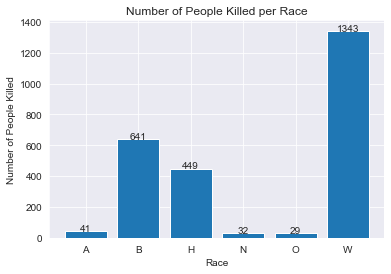

In [338]:
x_list = race_count.index.tolist()
y_list = race_count.tolist()
plt.bar(x_list, y_list)
plt.title("Number of People Killed per Race")
plt.xlabel("Race")
plt.ylabel("Number of People Killed")
for i in range(len(x_list)):
    plt.text(x_list[i], y_list[i], y_list[i], ha='center')
plt.show()

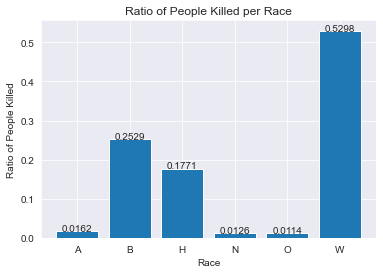

In [339]:
'''
Now we can find the ratio of deaths for each race over the total amount of deaths and visualize that data as well
'''

total_deaths = race_count.sum()
x_list = race_count.index.tolist()
y_list = [round((y / total_deaths), 4) for y in race_count.tolist()]
plt.bar(x_list, y_list)
plt.title("Ratio of People Killed per Race")
plt.xlabel("Race")
plt.ylabel("Ratio of People Killed")
for i in range(len(x_list)):
    plt.text(x_list[i], y_list[i], y_list[i], ha='center')
plt.show()

In [340]:
"""
In order to find the impact of deaths proportionate to its respective race, we need to use the supporting dataset.
We must find the 1/race proportion that race holds in order to see the impact of a person's life proportionate to the race population.
1. Find total proportion each race holds in the united states
2. take 1/proportion
3. Multiply it by the rate of death for that race
4. Compare the impact values to see how much each death impacts one race vs another
"""
list_total_races = []
j = 0
columns_race.sort()
print(columns_race)
for i in columns_race:
    newDF = df_temp[i].astype(float)
    list_total_races.append(newDF.sum())
    print(list_total_races[j])
    j+=1
sum_all_races = sum(list_total_races)
proportional_share = [i/sum_all_races for i in list_total_races]
proportional_share = [1/i for i in proportional_share]
print(proportional_share)
del y_list[4]
print(y_list)
res_race_porportion = []
j = 0
for i in proportional_share:
    x = y_list[j]
    j+=1
    res_race_porportion.append(i*x)
res_race_porportion


['share_asian', 'share_black', 'share_hispanic', 'share_native_american', 'share_white']
45167.763625974054
199939.02234999335
272926.3445175891
84111.02885521147
2434255.740651232
0.9999999999999999
[67.22493336495182, 15.186629724960747, 11.125345577639228, 36.099902014358335, 1.2473627356785766]
[0.0162, 0.2529, 0.1771, 0.0126, 0.5298]


[1.0890439205122195,
 3.8406986574425734,
 1.9702987017999074,
 0.454858765380915,
 0.6608527773625099]

In [341]:
"""
We can observe that black people die
"""

'\nWe can observe that black people die\n'